# < 진행할 딥러닝 문제 >

## 1. Boston 주택 가격 예측 딥러닝 모델
## 2. Reuters 텍스트 분류 딥러닝 모델
## 3. CIFAR10 이미지 분류 딥러닝 모델
--------


#  1. Boston 주택 가격 예측 모델
### 데이터 피처 살펴보기
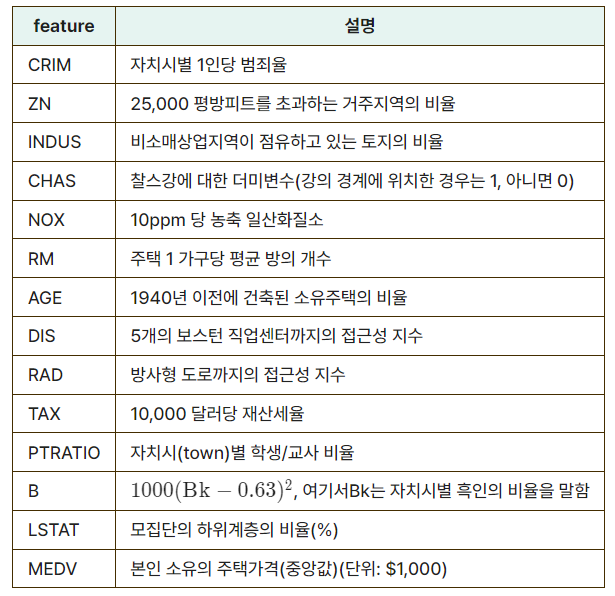

## (1) 라이브러리 및 데이터 불러오기

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(train_labels))
print(len(test_data))
print(len(test_labels))

65536/57026 [==================================] - 0s 0us/step
404
404
102
102


## (2) 데이터 전처리

In [6]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]
mean = train_data.mean(axis = 0)
train_data = train_data - mean
print(mean)
# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]
std = train_data.std(axis=0)
z_train = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]
test_data = test_data - mean
test_data = test_data / std

[-1.01541438e-16  1.09923072e-17  1.80933376e-15 -7.80453809e-17
 -5.25047552e-15  6.43187374e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.05526149e-16  2.36614908e-14  5.96710525e-15
  6.13920356e-16]


## (3) 모델 구성 및 컴파일

In [8]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(13, activation='relu', input_shape=(z_train.shape[1], )))
model.add(layers.Dense(13, activation='tanh'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

model.summary()

model.compile(loss='mse',
              optimizer='Adam',
              metrics=['mae'])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 5,485
Trainable params: 5,485
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True)

## (4) 모델 학습

In [9]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(z_train, 
                                                    train_labels, 
                                                    test_size=0.2, 
                                                    random_state=42)

history = model.fit(x_train, y_train,
                    epochs=300,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 612.1311 - mae: 22.7903 - val_loss: 468.2183 - val_mae: 20.3873
Epoch 2/300
1/1 [==============================] - 0s 24ms/step - loss: 610.1656 - mae: 22.7355 - val_loss: 465.9911 - val_mae: 20.3230
Epoch 3/300
1/1 [==============================] - 0s 25ms/step - loss: 607.6864 - mae: 22.6708 - val_loss: 463.3094 - val_mae: 20.2512
Epoch 4/300
1/1 [==============================] - 0s 23ms/step - loss: 604.6230 - mae: 22.5968 - val_loss: 460.2157 - val_mae: 20.1717
Epoch 5/300
1/1 [==============================] - 0s 24ms/step - loss: 601.1396 - mae: 22.5154 - val_loss: 456.8202 - val_mae: 20.0861
Epoch 6/300
1/1 [==============================] - 0s 23ms/step - loss: 597.2020 - mae: 22.4256 - val_loss: 453.1245 - val_mae: 19.9940
Epoch 7/300
1/1 [==============================] - 0s 22ms/step - loss: 592.8607 - mae: 22.3293 - val_loss: 449.2717 - val_mae: 19.8987
Epoch 8/300
1/1 [==============================] -

1/1 [==============================] - 0s 21ms/step - loss: 73.1952 - mae: 6.0377 - val_loss: 43.5577 - val_mae: 5.1684
Epoch 62/300
1/1 [==============================] - 0s 21ms/step - loss: 70.2631 - mae: 5.9299 - val_loss: 43.5341 - val_mae: 5.2065
Epoch 63/300
1/1 [==============================] - 0s 20ms/step - loss: 68.0956 - mae: 5.8577 - val_loss: 43.9867 - val_mae: 5.2660
Epoch 64/300
1/1 [==============================] - 0s 21ms/step - loss: 66.5803 - mae: 5.8360 - val_loss: 44.7873 - val_mae: 5.3639
Epoch 65/300
1/1 [==============================] - 0s 21ms/step - loss: 65.6000 - mae: 5.8503 - val_loss: 45.8025 - val_mae: 5.4911
Epoch 66/300
1/1 [==============================] - 0s 20ms/step - loss: 65.0295 - mae: 5.8831 - val_loss: 46.9027 - val_mae: 5.6070
Epoch 67/300
1/1 [==============================] - 0s 20ms/step - loss: 64.7441 - mae: 5.9224 - val_loss: 47.9691 - val_mae: 5.7134
Epoch 68/300
1/1 [==============================] - 0s 20ms/step - loss: 64.6279 -

1/1 [==============================] - 0s 20ms/step - loss: 43.1777 - mae: 4.5965 - val_loss: 25.8712 - val_mae: 3.9975
Epoch 123/300
1/1 [==============================] - 0s 21ms/step - loss: 42.9561 - mae: 4.5807 - val_loss: 25.6692 - val_mae: 3.9799
Epoch 124/300
1/1 [==============================] - 0s 21ms/step - loss: 42.7341 - mae: 4.5642 - val_loss: 25.4597 - val_mae: 3.9613
Epoch 125/300
1/1 [==============================] - 0s 22ms/step - loss: 42.5119 - mae: 4.5469 - val_loss: 25.2464 - val_mae: 3.9421
Epoch 126/300
1/1 [==============================] - 0s 21ms/step - loss: 42.2899 - mae: 4.5290 - val_loss: 25.0316 - val_mae: 3.9231
Epoch 127/300
1/1 [==============================] - 0s 25ms/step - loss: 42.0683 - mae: 4.5105 - val_loss: 24.8195 - val_mae: 3.9049
Epoch 128/300
1/1 [==============================] - 0s 22ms/step - loss: 41.8479 - mae: 4.4919 - val_loss: 24.6074 - val_mae: 3.8862
Epoch 129/300
1/1 [==============================] - 0s 21ms/step - loss: 41

1/1 [==============================] - 0s 19ms/step - loss: 31.7073 - mae: 3.8057 - val_loss: 17.9473 - val_mae: 3.2282
Epoch 184/300
1/1 [==============================] - 0s 21ms/step - loss: 31.5561 - mae: 3.7971 - val_loss: 17.8789 - val_mae: 3.2236
Epoch 185/300
1/1 [==============================] - 0s 21ms/step - loss: 31.4062 - mae: 3.7892 - val_loss: 17.8117 - val_mae: 3.2191
Epoch 186/300
1/1 [==============================] - 0s 20ms/step - loss: 31.2576 - mae: 3.7813 - val_loss: 17.7457 - val_mae: 3.2149
Epoch 187/300
1/1 [==============================] - 0s 21ms/step - loss: 31.1100 - mae: 3.7737 - val_loss: 17.6805 - val_mae: 3.2110
Epoch 188/300
1/1 [==============================] - 0s 20ms/step - loss: 30.9633 - mae: 3.7663 - val_loss: 17.6162 - val_mae: 3.2070
Epoch 189/300
1/1 [==============================] - 0s 20ms/step - loss: 30.8174 - mae: 3.7590 - val_loss: 17.5525 - val_mae: 3.2030
Epoch 190/300
1/1 [==============================] - 0s 19ms/step - loss: 30

1/1 [==============================] - 0s 20ms/step - loss: 23.6378 - mae: 3.3837 - val_loss: 14.6774 - val_mae: 3.0302
Epoch 245/300
1/1 [==============================] - 0s 21ms/step - loss: 23.5186 - mae: 3.3763 - val_loss: 14.6369 - val_mae: 3.0273
Epoch 246/300
1/1 [==============================] - 0s 20ms/step - loss: 23.3994 - mae: 3.3687 - val_loss: 14.5971 - val_mae: 3.0247
Epoch 247/300
1/1 [==============================] - 0s 20ms/step - loss: 23.2804 - mae: 3.3611 - val_loss: 14.5580 - val_mae: 3.0221
Epoch 248/300
1/1 [==============================] - 0s 20ms/step - loss: 23.1624 - mae: 3.3534 - val_loss: 14.5205 - val_mae: 3.0199
Epoch 249/300
1/1 [==============================] - 0s 19ms/step - loss: 23.0451 - mae: 3.3458 - val_loss: 14.4832 - val_mae: 3.0180
Epoch 250/300
1/1 [==============================] - 0s 20ms/step - loss: 22.9283 - mae: 3.3380 - val_loss: 14.4464 - val_mae: 3.0161
Epoch 251/300
1/1 [==============================] - 0s 20ms/step - loss: 22

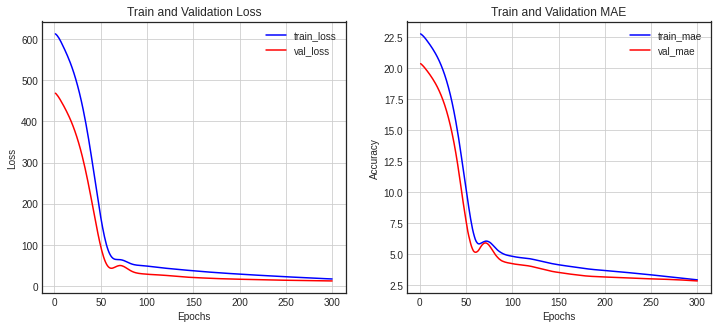

In [10]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## (5) 모델 평가 및 예측

In [11]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
# 모델 평가
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 23.5396 - mae: 3.4549


[23.53962516784668, 3.454923629760742]

-> loss가 23.5, mae가 3.45로 낮은 값을 보이며 괜찮게 학습되었다는 것을 알 수 있다.

# 2. Reuters 텍스트 분류 딥러닝 모델
## (1) 라이브러리 및 데이터 불러오기

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [13]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

x_train, x_val, y_train, y_val = train_test_split(train_data, 
                                                    train_labels, 
                                                    test_size=0.2, 
                                                    random_state=42)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(x_train))
print(len(x_val))
print(len(test_data))
print(len(set(train_labels)))

2121728/2110848 [==============================] - 0s 0us/step
7185
1797
2246
46


## (2) 데이터 전처리

In [14]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.

def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]
from tensorflow.keras import utils

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## (3) 모델 구성 및 컴파일

In [15]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(10000, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden1'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu', name='hidden2'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu', name='hidden3'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu', name='hidden4'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 10000)             100010000 
_________________________________________________________________
hidden1 (Dense)              (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
hidden2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
hidden3 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)              

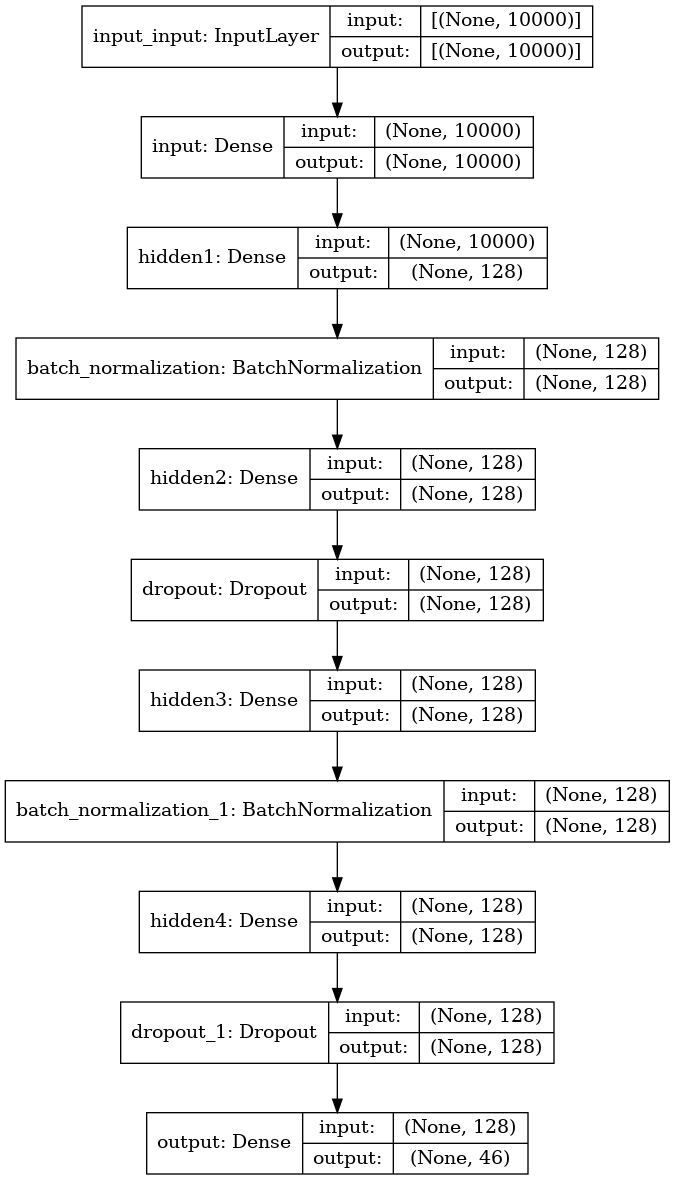

In [18]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True)

## (4) 모델 학습

In [19]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('Reuters_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
225/225 [==============================] - 12s 46ms/step - loss: 1.6481 - accuracy: 0.6322 - val_loss: 1.3304 - val_accuracy: 0.7012
Epoch 2/10
225/225 [==============================] - 10s 44ms/step - loss: 1.0872 - accuracy: 0.7562 - val_loss: 1.2887 - val_accuracy: 0.7362
Epoch 3/10
225/225 [==============================] - 10s 45ms/step - loss: 0.8291 - accuracy: 0.8090 - val_loss: 1.0512 - val_accuracy: 0.7980
Epoch 4/10
225/225 [==============================] - 10s 44ms/step - loss: 0.6732 - accuracy: 0.8406 - val_loss: 1.3238 - val_accuracy: 0.7974
Epoch 5/10
225/225 [==============================] - 10s 45ms/step - loss: 0.5505 - accuracy: 0.8665 - val_loss: 1.2456 - val_accuracy: 0.7841
Epoch 6/10
225/225 [==============================] - 10s 44ms/step - loss: 0.4800 - accuracy: 0.8892 - val_loss: 1.3894 - val_accuracy: 0.7947


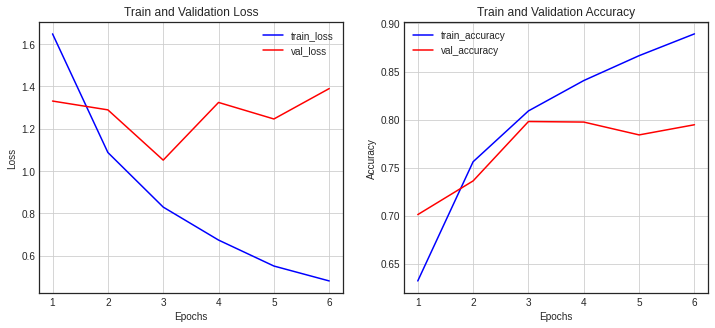

In [20]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## (5) 모델 평가 및 예측

In [21]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]

model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 5ms/step - loss: 1.2100 - accuracy: 0.7542


[1.2100452184677124, 0.754229724407196]

-> loss가 1.2 정확도가 75%로 성능이 엄청 좋지는 않지만 꽤 분류를 잘 하는 것으로 볼 수 있다.

# 3. CIFAR10 이미지 분류 딥러닝 모델
## (1) 라이브러리 및 데이터 불러오기

In [47]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [48]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, 
                                                    y_train_full, 
                                                    test_size=0.2, 
                                                    random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


## (2) 데이터 전처리

In [49]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

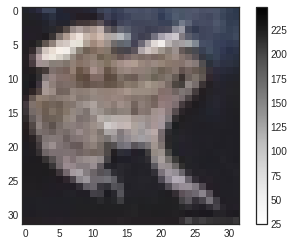

In [50]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [51]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 1)
(10000, 1)
(10000, 1)


In [52]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape((x_train.shape[0], 3072))
x_val = x_val.reshape((x_val.shape[0], 3072))
x_test = x_test.reshape((x_test.shape[0], 3072))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [53]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## (3) 모델 구성 및 컴파일

In [54]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(3072, activation='relu', input_shape=(3072, ), name='input'))
model.add(layers.Dense(2048, activation='relu', name='hidden1'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2048, activation='relu', name='hidden2'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1024, activation='relu', name='hidden3'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='relu', name='hidden4'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu', name='hidden5'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu', name='hidden6'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden1 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_8 (Batch (None, 2048)              8192      
_________________________________________________________________
hidden2 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_8 (Dropout)          (None, 2048)              0         
_________________________________________________________________
hidden3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_9 (Batch (None, 1024)             

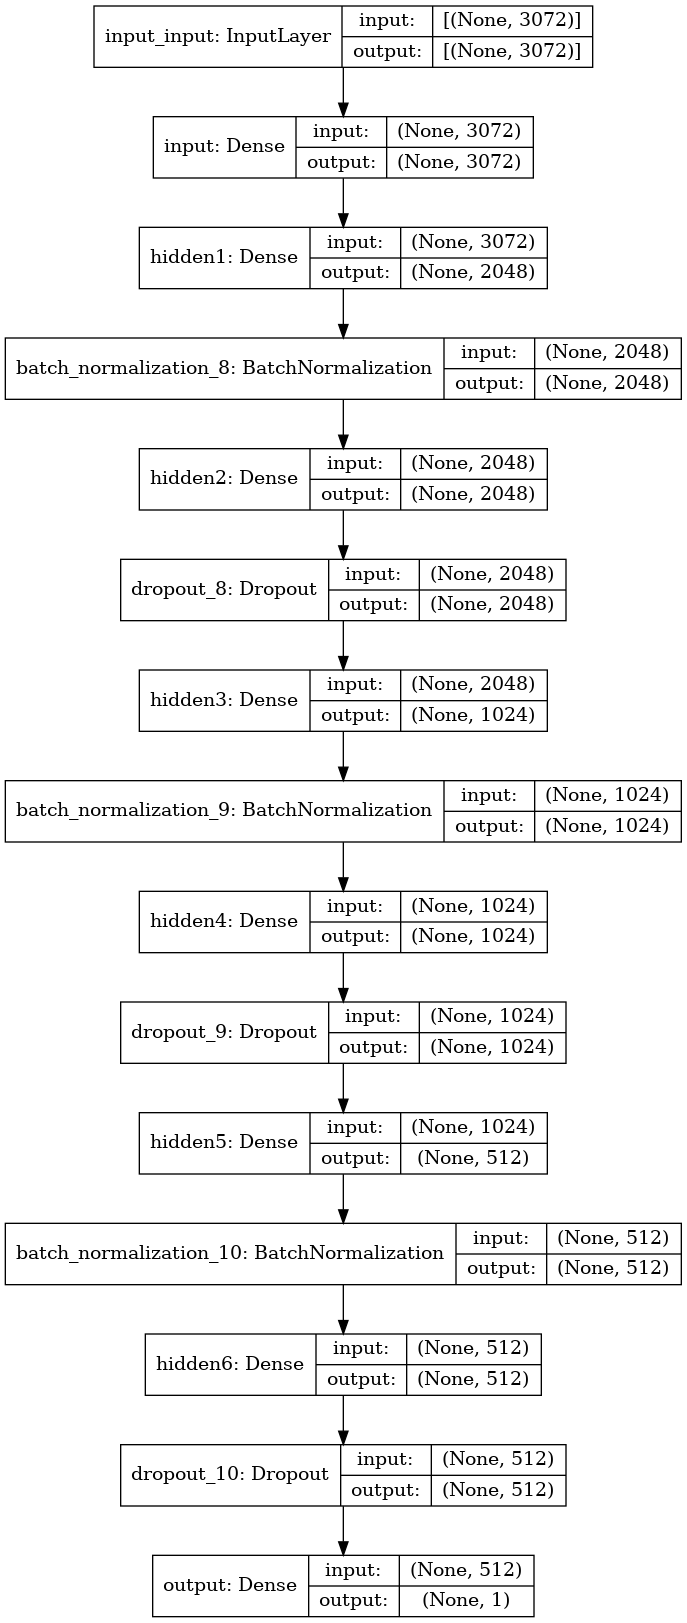

In [56]:
utils.plot_model(model, show_shapes=True)

## (4) 모델 학습

In [57]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h1', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1250/1250 [==============================] - 18s 13ms/step - loss: 0.0000e+00 - accuracy: 0.1005 - val_loss: 0.0000e+00 - val_accuracy: 0.0979
INFO:tensorflow:Assets written to: CIFAR10_model.h1/assets
Epoch 2/10
1250/1250 [==============================] - 16s 13ms/step - loss: 0.0000e+00 - accuracy: 0.1005 - val_loss: 0.0000e+00 - val_accuracy: 0.0979
Epoch 3/10
1250/1250 [==============================] - 16s 13ms/step - loss: 0.0000e+00 - accuracy: 0.1005 - val_loss: 0.0000e+00 - val_accuracy: 0.0979
Epoch 4/10
1250/1250 [==============================] - 16s 13ms/step - loss: 0.0000e+00 - accuracy: 0.1005 - val_loss: 0.0000e+00 - val_accuracy: 0.0979


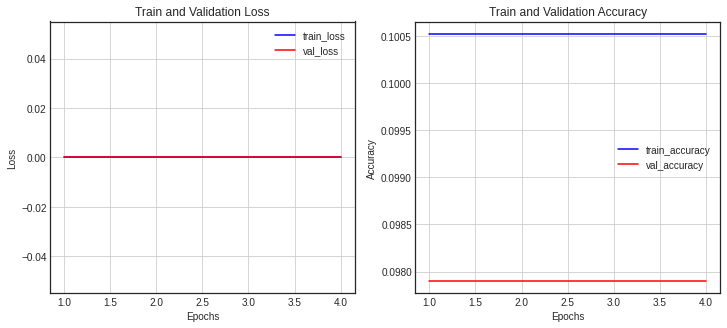

In [60]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## (5) 모델 평가 및 예측

In [59]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1000


[0.0, 0.10000000149011612]

-> 희한하게도 loss가 0이고 정확도가 10%인 모델이 만들어졌다..모델을 학습데이터에만 너무 fit하도록 복잡하게 만들어져서 이런 결과가 나온 것 같다. 다시 모델을 단순화시켜서 만들어보아야겠다.

## (6) 3번 프로젝트 다시 시도

In [36]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [37]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, 
                                                    y_train_full, 
                                                    test_size=0.2, 
                                                    random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [72]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
#라벨을 원핫인코딩 방식으로 나누어준다.

from tensorflow.keras import utils

y_train = utils.to_categorical(y_train, 10)
y_val = utils.to_categorical(y_val, 10)
y_test = utils.to_categorical(y_test, 10)

In [73]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)
(40000, 10)
(10000, 10)
(10000, 10)


In [74]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape((x_train.shape[0], 3072))
x_val = x_val.reshape((x_val.shape[0], 3072))
x_test = x_test.reshape((x_test.shape[0], 3072))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [75]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [79]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(3072, activation='relu', input_shape=(3072, ), name='input'))
model.add(layers.Dense(2048, activation='relu', name='hidden1'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu', name='hidden3'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu', name='hidden4'))
model.add(layers.Dense(32, activation='relu', name='hidden5'))
model.add(layers.Dense(10, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

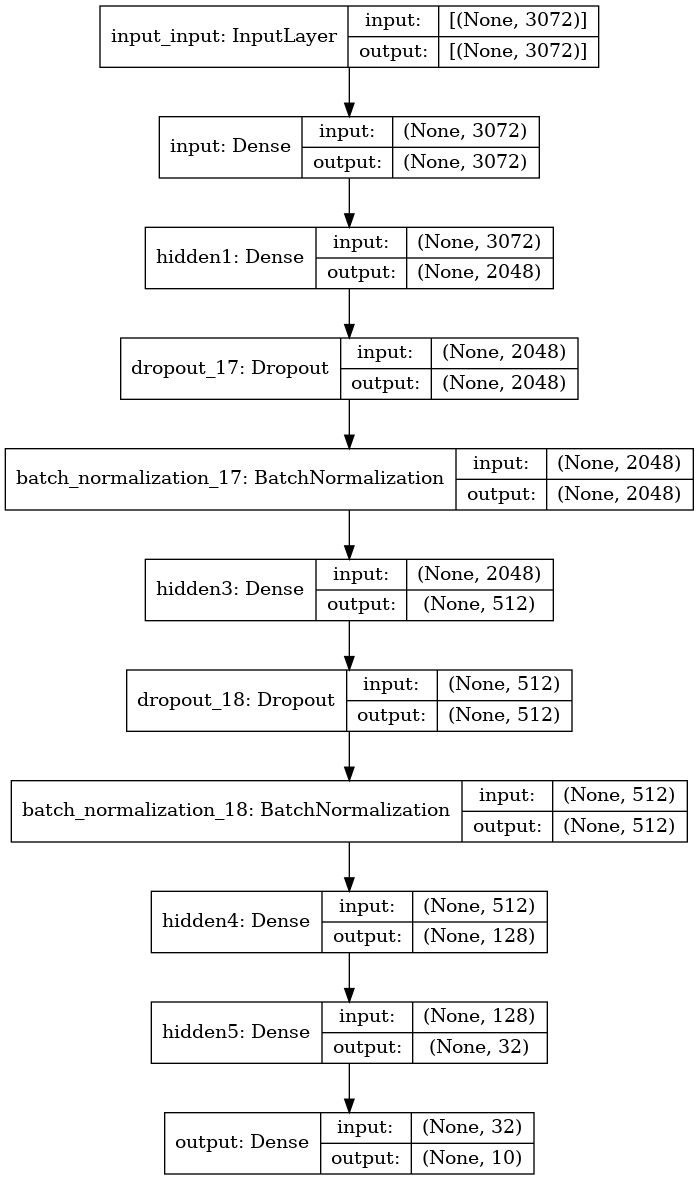

In [80]:
utils.plot_model(model, show_shapes=True)

In [81]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h2', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
1250/1250 [==============================] - 14s 10ms/step - loss: 1.9563 - accuracy: 0.2898 - val_loss: 1.8442 - val_accuracy: 0.3327
INFO:tensorflow:Assets written to: CIFAR10_model.h2/assets
Epoch 2/100
1250/1250 [==============================] - 12s 10ms/step - loss: 1.7869 - accuracy: 0.3580 - val_loss: 1.8679 - val_accuracy: 0.3477
Epoch 3/100
1250/1250 [==============================] - 13s 10ms/step - loss: 1.7160 - accuracy: 0.3828 - val_loss: 1.7197 - val_accuracy: 0.3863
INFO:tensorflow:Assets written to: CIFAR10_model.h2/assets
Epoch 4/100
1250/1250 [==============================] - 13s 10ms/step - loss: 1.6634 - accuracy: 0.4016 - val_loss: 1.7241 - val_accuracy: 0.3950
Epoch 5/100
1250/1250 [==============================] - 13s 10ms/step - loss: 1.6191 - accuracy: 0.4228 - val_loss: 1.6663 - val_accuracy: 0.4225
INFO:tensorflow:Assets written to: CIFAR10_model.h2/assets
Epoch 6/100
1250/1250 [==============================] - 13s 10ms/step - loss: 1.5949 - 

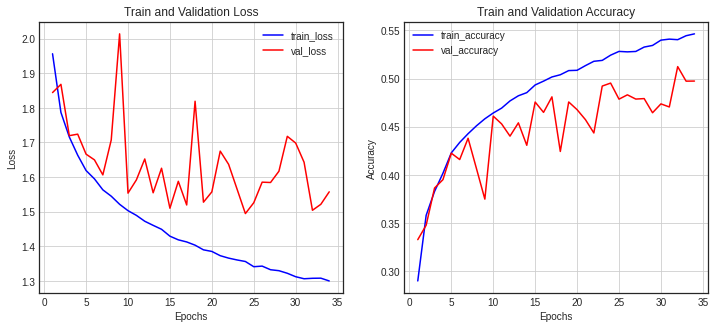

In [82]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [83]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4924 - accuracy: 0.5015


[1.4923686981201172, 0.5015000104904175]

-> 아무리 hidden layer에 변화를 줘도 아무런 변화가 없다가 label을 10개로 정해주니 그래도 정확도 50%까지 올릴 수 있었다. 

# 프로젝트 회고

## 배운점
1. 이미지 데이터를 이용할 때 모델의 shape를 맞추는 것이 중요하다. 맞추는 방법은 여러가지가 있는데 그중에 하나는 x_train.reshape((x_train.shape[0], 3072))이고, 다른 하나는 x_train.reshape((-1, 3072))이다. 
2. BatchNormalization과 Dropout을 이용하여 모델의 과적합을 막고 성능을 높힌다는 것을 배웠다. '밑바닥에서 시작하는 딥러닝'에서는 BatchNormalization는 보통 활성화 함수 이전에 쓰인다고 했는데 사실 어느 순서에서 쓰여도 성능은 상관 없는 것 같다.
3. ModelCheckpoint와 EarlyStopping 콜백 함수를 이용하면 적당한 epoch의 크기를 조절할 필요 없이 큰 변화가 없을 때 불필요한 학습을 하지 않고 중단하니 유용한 것 같다. 앞으로도 이 함수를 사용해야겠다. 

## 아쉬운점
1. 3번 프로젝트에서 에폭이 34번이 될 때까지 거의 1시간을 기다렸다. 이수안 선생님은 에폭을 800까지 늘렸던데 그럼 그만큼 시간을 기다리신 것인지 어떻게 에폭 수를 그렇게까지 늘릴 수 있었는지 궁금하다.
2. label을 원핫인코딩을 하여 정확도를 50%까지 올릴 수 있었다. 그 이상으로 성능을 높히려면 역시 CNN을 사용해야겠다는 생각이 들었다. 

## 종합평가
드디어 본격적인 딥러닝에 대해 자세히 공부한다. 데이터 분석의 성능을 높히기 위해 여러가지 방법을 사용하고 모델을 배워가는 과정이 재밌다. 그동안 배운 것을 언제든 필요할 때 쓸 수 있도록 복습을 하고 확실하지 않은 개념을 정리하는 시간이 필요할 것 같다. 앞으로 CV나 NLP로 크게 나누어 공부할 텐데 기대된다. 

# Refernce
1. 콜백 함수  
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=baek2sm&logNo=222013688414  